In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/aishwarya/Documents/Spring'23/Data Mining/Project/walmart-sales-dataset-of-45stores.csv")

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Default Products
0,1,5/2/10,1643690.90,0,42.31,2.572,211.096358,8.106,NaN
1,1,12/2/10,1641957.44,1,38.51,2.548,211.242170,8.106,12.0
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,NaN
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,NaN
4,1,5/3/10,1554806.68,0,46.50,2.625,211.350143,8.106,NaN


In [7]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes
df['Year'] = df['Date'].dt.year 
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Default Products,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12.0,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,NaN,2010


In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Default Products,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,21.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,112.380952,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,166.492785,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,12.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,45.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,85.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,550.000000,2012.000000


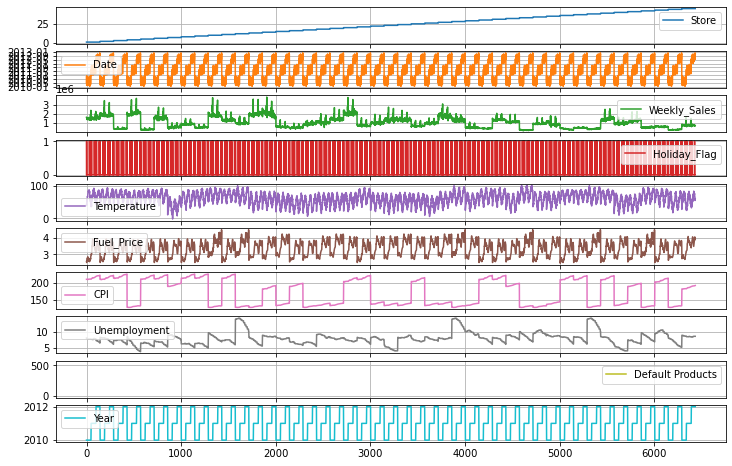

In [9]:
# Value Distributon of the plots
df.plot(subplots=True, grid=True, figsize=(12,8));

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>],
       [<AxesSubplot:title={'center':'Holiday_Flag'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'Default Products'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

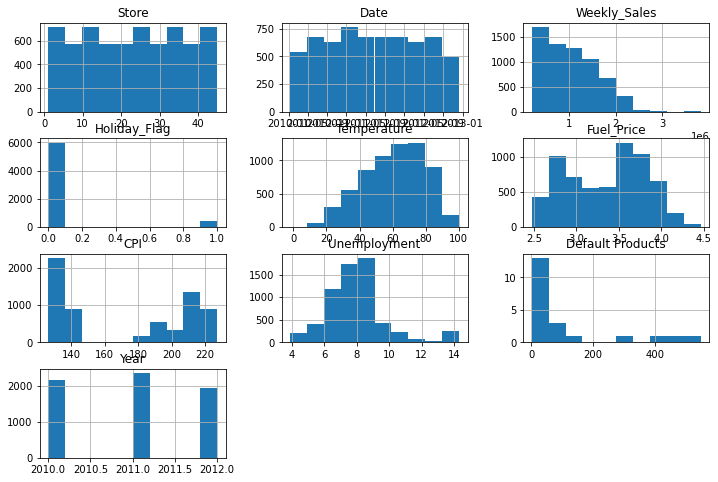

In [10]:
# Histogram of our data

df.hist(figsize = (12,8))

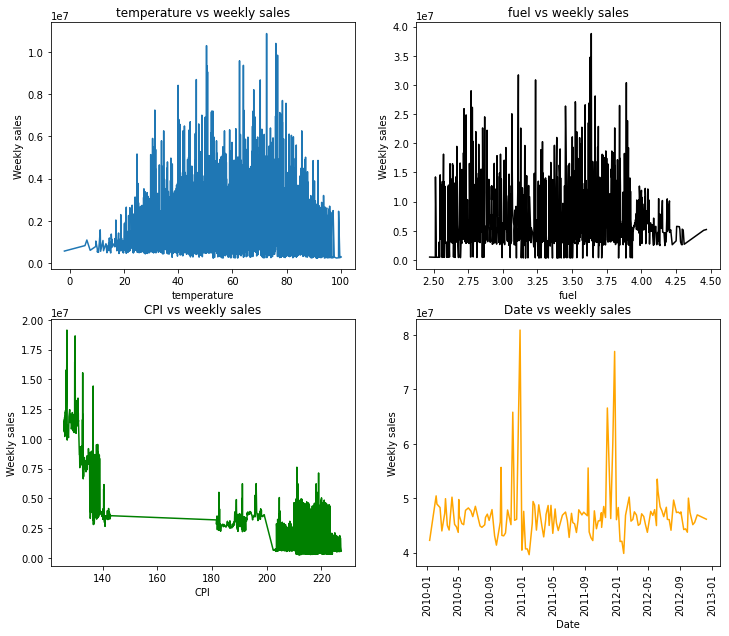

In [11]:
# Relation between sales and other numeric features

# make a subplot that constu=itutes of 4 different plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# the first plot is to show the correlation between temperature and weekly sales
ax[0, 0].set_title("temperature vs weekly sales")
ax[0, 0].set_xlabel("temperature")
ax[0, 0].set_ylabel("Weekly sales")
ax[0, 0].plot(df.groupby('Temperature')['Weekly_Sales'].sum())

# the second plot is to show the correlation between fuel price and weekly sales
ax[0, 1].set_title("fuel vs weekly sales")
ax[0, 1].set_xlabel("fuel")
ax[0, 1].set_ylabel("Weekly sales")
ax[0, 1].plot( df.groupby('Fuel_Price')['Weekly_Sales'].sum(), color = "black")

# the third plot is to show the correlation between CPI and weekly sales
ax[1, 0].set_title("CPI vs weekly sales")
ax[1, 0].set_xlabel("CPI")
ax[1, 0].set_ylabel("Weekly sales")
ax[1, 0].plot(df.groupby('CPI')['Weekly_Sales'].sum(), color = "green")

# the fourth plot is to show the correlation between the date and weekly sales

ax[1, 1].set_title("Date vs weekly sales")
ax[1, 1].set_xlabel("Date")
ax[1, 1].set_ylabel("Weekly sales")
plt.xticks(rotation=90 )
ax[1, 1].plot(df.groupby('Date')['Weekly_Sales'].sum(), color = "orange")

# Display the figure
plt.show()


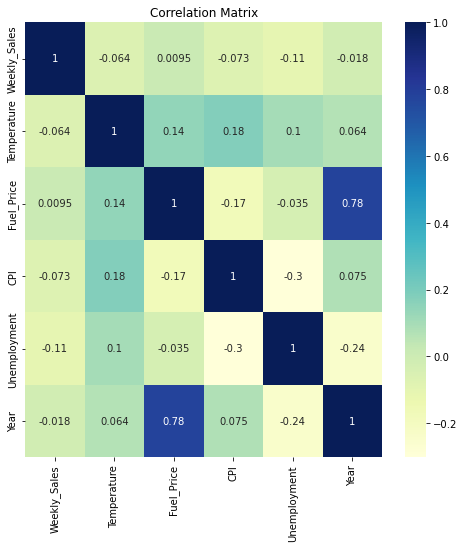

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment","Year"]].corr(),cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix');

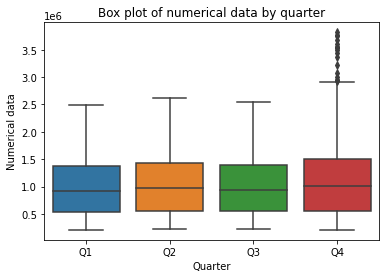

In [13]:
df['quarter'] = df['Date'].dt.quarter
# Group the data by quarter and extract the numerical data column
grouped_data = df.groupby('quarter')['Weekly_Sales'].apply(list)

# Create a box plot for each quarter

# fig, ax = plt.subplots()
# ax.boxplot(grouped_data.values)
# ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
# ax.set_title('Box plot of numerical data by quarter')
# ax.set_xlabel('Quarter')
# ax.set_ylabel('Numerical data')
# plt.show()

sns.boxplot(x='quarter', y='Weekly_Sales', data=df)
plt.title('Box plot of numerical data by quarter')
plt.xlabel('Quarter')
plt.ylabel('Numerical data')
plt.xticks(range(4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()


Text(0.5, 1.0, 'Sales in 2010')

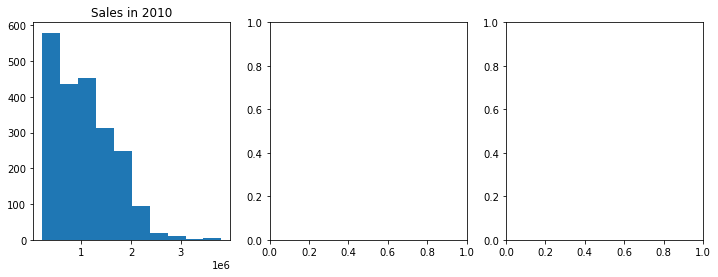

In [14]:
# histogram to compare yearly sales

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].hist(df[df['Year'] == 2010]['Weekly_Sales'])
axs[0].set_title('Sales in 2010')

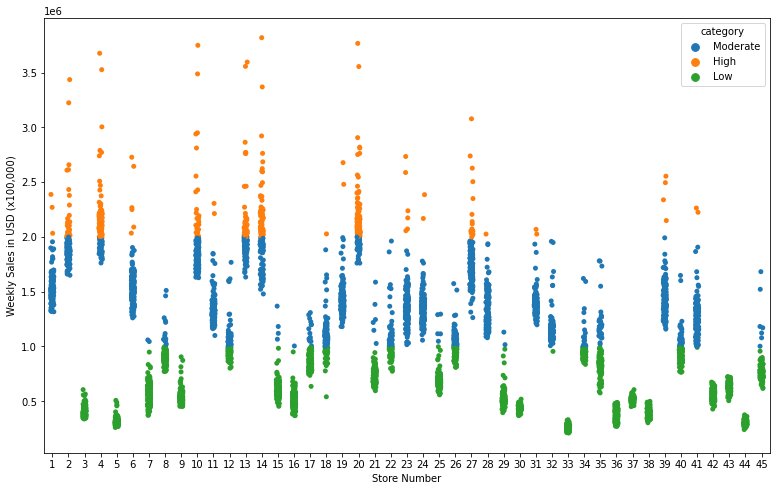

In [15]:
# Creating categories for sales data
# All sales below 1,000,000 will be 'Low', those between 1,000,000 and 2,000,000 will be 'Moderate' and those 
# above 2,000,000 will be 'High'

df['category'] = np.where(df['Weekly_Sales']<1000000, 'Low', 
                           (np.where(df['Weekly_Sales']<=2000000, 'Moderate', 'High')))

# Display stats of sales at each store

fig, ax = plt.subplots(figsize=(13,8))
sns.stripplot(data=df, x='Store', y='Weekly_Sales', hue='category')
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales in USD (x100,000)')
plt.show()

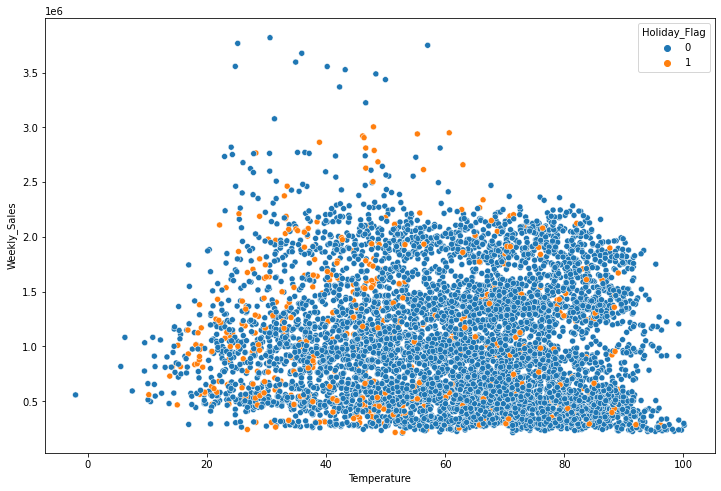

In [16]:
# scatterplot

fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(data=df, x=df['Temperature'], y=df['Weekly_Sales'], hue = 'Holiday_Flag');

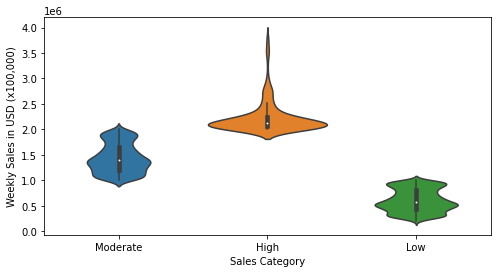

In [17]:
# Violin Plot

# Overall sales

fig, ax = plt.subplots(figsize=(8,4))
sns.violinplot(data=df, x='category', y='Weekly_Sales')
plt.xlabel('Sales Category')
plt.ylabel('Weekly Sales in USD (x100,000)')
plt.show()

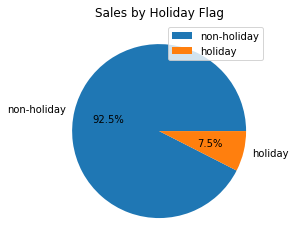

In [18]:
# Pie plot

# compute the total sales for each holiday flag
holiday_sales = df.groupby("Holiday_Flag")["Weekly_Sales"].sum()

# create a pie chart with percentages
plt.pie(holiday_sales, labels=["non-holiday", "holiday"], autopct='%1.1f%%')
plt.title('Sales by Holiday Flag')

# show the legend and plot
plt.legend()
plt.show()

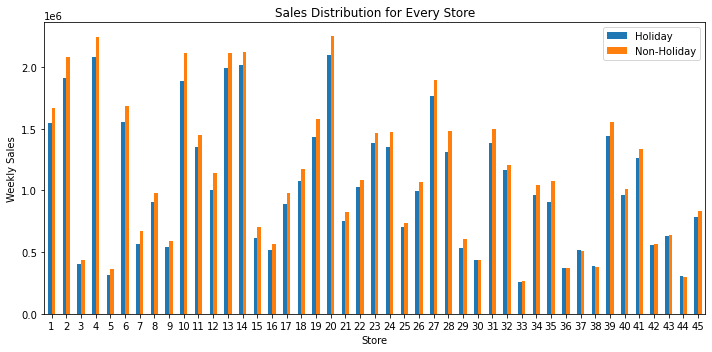

In [19]:


grouped_data = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().unstack()

# create a bar chart with holiday and non-holiday sales data side-by-side for each store
fig, ax = plt.subplots(figsize=(10, 5))
grouped_data.plot(kind='bar', ax=ax, rot=0)

# set the axis labels and titles
ax.set_xlabel('Store')
ax.set_ylabel('Weekly Sales')
ax.set_title('Sales Distribution for Every Store')

# show the legend and plot
plt.legend(['Holiday', 'Non-Holiday'])
plt.tight_layout()
plt.show()






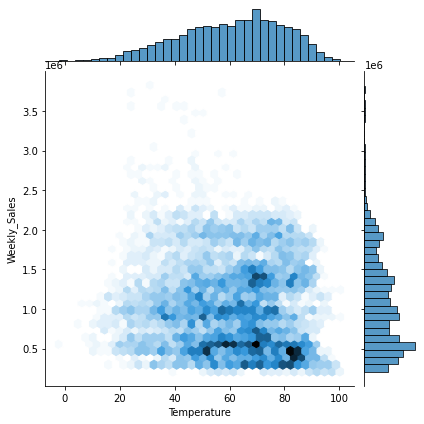

In [20]:
sns.jointplot(data=df,x='Temperature',y='Weekly_Sales',kind='hex')
# The least Sales happened during high temperatures

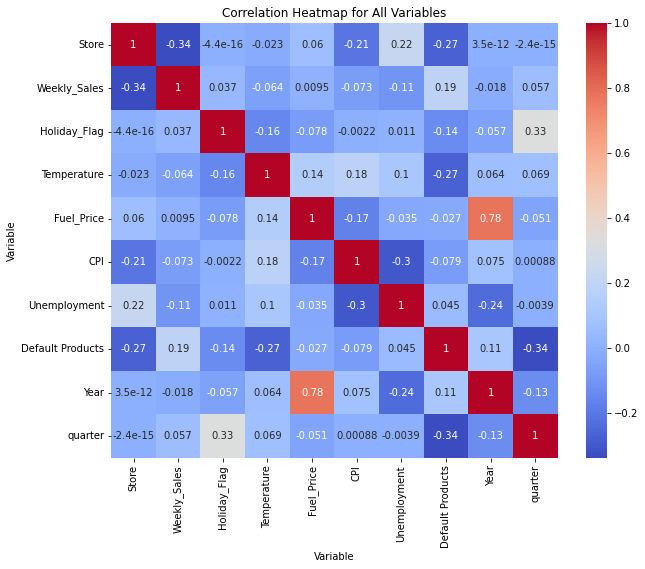

In [21]:
# Heatmap

corr_matrix = df.corr()

# create a heatmap using Seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# set the axis labels and title
ax.set_xlabel('Variable')
ax.set_ylabel('Variable')
ax.set_title('Correlation Heatmap for All Variables')

# show the plot
plt.show()

In [22]:
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# # loop through each year and create a bar plot
# for i, year in enumerate([2010, 2011, 2012]):
#     # subset the data for the current year
#     year_data = df[df['Year'] == year]
    
#     # compute the annual sales for each store
#     annual_sales = year_data.groupby('Store')['Weekly_Sales'].sum()
    
#     # create a bar plot
#     sns.barplot(x=annual_sales.index, y=annual_sales.values, ax=ax[i], hue='Year', data=year_data)
    
#     # set the axis labels and title
#     ax[i].set_xlabel('Store Number')
#     ax[i].set_ylabel('Annual Sales')
#     ax[i].set_title(f'Annual Sales by Store for {year}')
    
#     # rotate the x-axis labels for better readability
#     ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

# # adjust the layout and padding of the subplots
# plt.tight_layout(pad=3)

# # show the plot
# plt.show()






In [25]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['MonthYear_value'] = df['Date'].dt.to_period('M')



In [26]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Default Products', 'Year',
       'quarter', 'category', 'Month', 'Day', 'MonthYear_value'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']]
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)
scaler = StandardScaler()
standardized_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
standardized_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

* Random Forest Regressor *

Accuracy                 = 95.589 %
Mean Absolute Error      = 65323.66165
Mean Squared Error       = 13983285619.69574
Root Mean Squared Error  = 118250.94342


/Users/aishwarya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

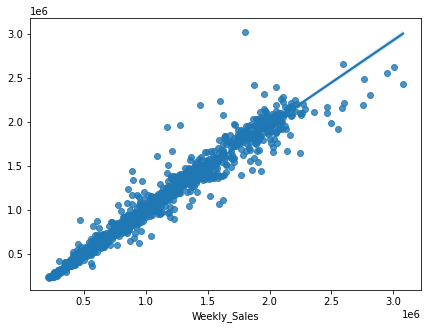

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

rfr_y_pred = rfr.predict(X_test)

R2_rfr = r2_score(y_test, rfr_y_pred)
mae = metrics.mean_absolute_error(y_test, rfr_y_pred)
mse = metrics.mean_squared_error(y_test, rfr_y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rfr_y_pred))

print('* Random Forest Regressor *\n')

print('Accuracy                 =', R2_rfr.round(5)*100,'%')
print('Mean Absolute Error      =', mae.round(5))
print('Mean Squared Error       =', mse.round(5))
print('Root Mean Squared Error  =', rmse.round(5))

plt.figure(figsize=(7,5))
sns.regplot(y_test, rfr_y_pred)